## 共轭梯度法求解题1

In [26]:
import numpy as np
# import math

In [27]:
# 基本参数
eps=1e-6    #设定终止条件
x=np.array([[0],[0]],dtype=float) #设定x的初始值
Q=np.array([[4,2],[2,2]],dtype=float) # 正定矩阵Q

In [28]:
def grad(x):
    '''
    梯度函数
    :param x:
    :return:
    '''
    return np.array([[1+4*x[0][0]+2*x[1][0]],[-1+2*x[0][0]+2*x[1][0]]])

def lam(p,Q,x):
    '''
    步长因子
    :param p:
    :param Q:
    :return:
    '''
    return -float(np.dot(p.T,grad(x)))/float(np.dot(np.dot(p.T,Q),p))

def direction(p,Q,x):
    '''
    共轭方向的计算
    :param p:
    :param x:
    :return:
    '''
    return -grad(x)+float((p.T.dot(Q).dot(grad(x)))/(p.T.dot(Q).dot(p)))*p

def f(x):
    '''
    目标函数
    :param x:
    :return:
    '''
    return x[0][0]-x[1][0]+2*x[0][0]*x[0][0]+2*x[0][0]*x[1][0]+x[1][0]*x[1][0]

In [29]:
gradi=grad(x)   # 初始梯度
p_i=gradi   # 初始方向
print(p_i)
lambda_i=float(lam(p_i,Q,x))
p_i_res=[p_i]
lambda_i_res=[lambda_i]
f_res=[f(x)]
x1=[x[0][0]]
x2=[x[1][0]]

[[ 1.]
 [-1.]]


In [30]:
while abs(np.linalg.norm(gradi,ord=1))>eps:  # ord=1代表1范数
    # print('lambda_i:'+str(lambda_i))
    # print('p_i:'+str(p_i))
    x+=lambda_i*p_i
    # print('x:'+str(x))
    # print('新梯度：'+str(grad(x)))
    gradi=grad(x)
    f_res.append(f(x))
    x1.append(x[0][0])
    x2.append(x[1][0])
    if abs(np.linalg.norm(gradi,ord=1))<=eps:
        # 新梯度超过eps，终止
        break


    p_i=direction(p_i,Q,x)
    lambda_i=float(lam(p_i,Q,x))
    lambda_i_res.append(lambda_i)
    p_i_res.append(p_i)
    # print('-----')
print('-------')
print('步长因子变化：'+str(lambda_i_res))
print('方向变化:'+str(p_i_res))
print('目标函数值变化:'+str(f_res))

-------
步长因子变化：[-1.0, 0.25]
方向变化:[array([[ 1.],
       [-1.]]), array([[0.],
       [2.]])]
目标函数值变化:[0.0, -1.0, -1.25]


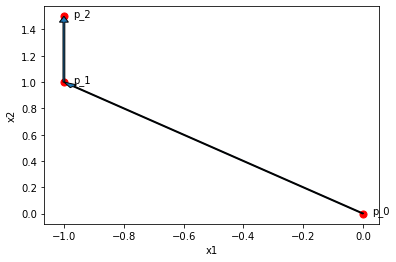

In [67]:
import matplotlib.pyplot as plt

plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1,x2,marker='o',color='red',s=50)

# 为每个点添加标签
for i in range(len(x1)):
    plt.annotate('p_%d'%(i),xy=(x1[i],x2[i]),xytext=(x1[i]+0.03,x2[i]))


for i in range(len(x1)-1):
    plt.arrow(x1[i],x2[i],x1[i+1]-x1[i],x2[i+1]-x2[i],width=0.006,length_includes_head=True,head_width=0.03)

plt.show()

根据上述结果，得到目标函数最小值为$ -1.25 $